## Configuração e Customização Avançada do Matplotlib

In [1]:
!pip install matplotlib==3.2.0

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')
import matplotlib
%matplotlib inline

In [3]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [4]:
def cria_plot():
    x = np.random.randn(5000, 6)
    (figure, axes) = plt.subplots(figsize = (16, 10))
    (n, bins, patches) = axes.hist(x, 12,
                                  density = 1,
                                  histtype = 'bar',
                                  label = ['Color 1', 'Color 2', 'Color 3', 'Color 4', 'Color 5', 'Color 6'])
    axes.set_title("Histograma\nPara\nDistribuição Normal", fontsize = 25)
    axes.set_xlabel("Dados", fontsize = 16)
    axes.set_ylabel("Frequência", fontsize = 16)
    axes.legend()
    plt.show()

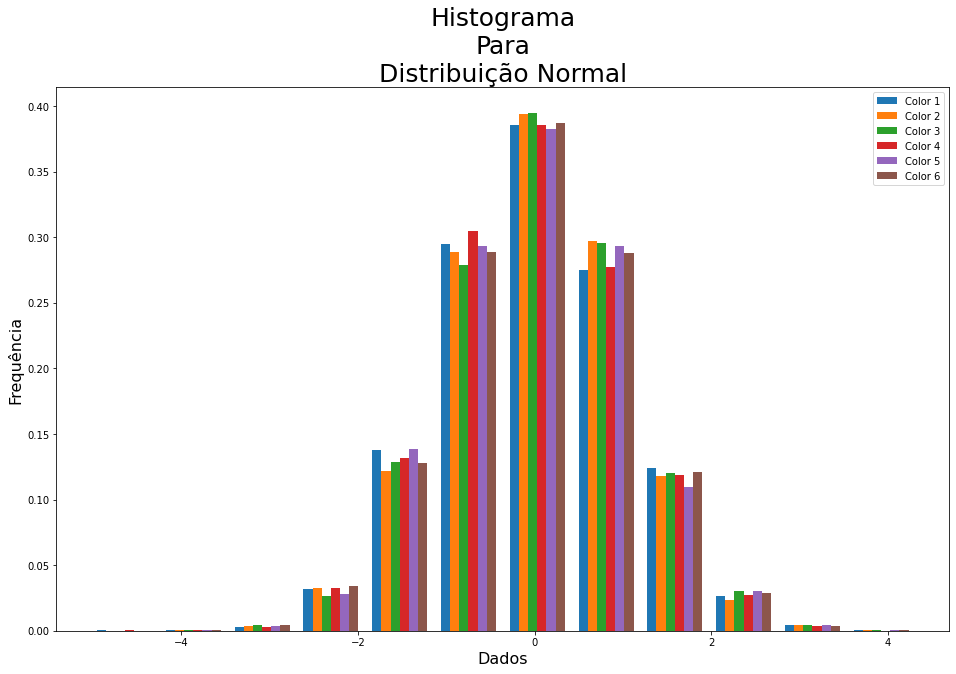

In [5]:
cria_plot()

In [6]:
!ls -l estilos

total 16
-rw-r--r--  1 michel  staff  473 Mar 24 21:10 personalestilo-1.mplstyle
-rw-r--r--  1 michel  staff  473 Mar 24 21:17 personalestilo-2.mplstyle


In [7]:
cat estilos/personalestilo-1.mplstyle

lines.color: 4e5d6c
patch.edgecolor: 4e5d6c

text.color: cdced1

axes.facecolor: 2b3e50
axes.edgecolor: 4e5d6c
axes.labelcolor: ff812d
axes.color_cycle: df691b, 5cb85c, 5bc0de, f0ad4e, d9534f, 4e5d6c
axes.axisbelow: True

xtick.color: 8c949d
ytick.color: 8c949d

grid.color: 4e5d6c

figure.facecolor: 2b3e50
figure.edgecolor: 2b3e50

savefig.facecolor: 2b3e50
savefig.edgecolor: 2b3e50

legend.fancybox: True
legend.shadow: True
legend.frameon: True
legend.framealpha: 0.6


In [8]:
plt.style.use('estilos/personalestilo-1.mplstyle')


Bad key "axes.color_cycle" on line 9 in
estilos/personalestilo-1.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.0/matplotlibrc.template
or from the matplotlib source distribution


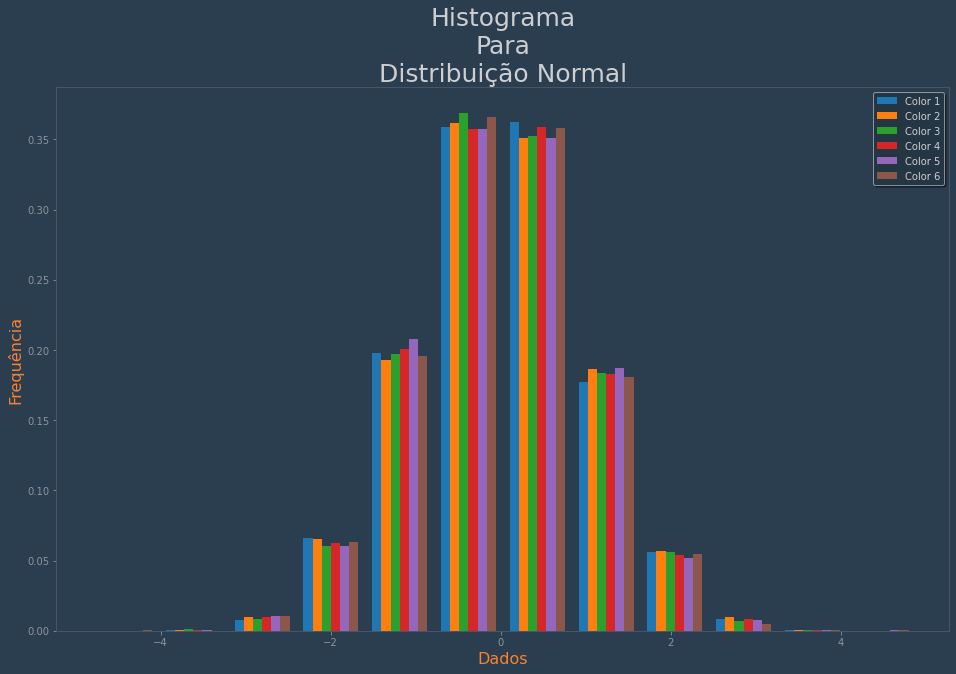

In [9]:
cria_plot()

## Subplots

Utilizando o dataset sobre automóveis do repositório de Machine Learning da UCI

## Usando o Pandas para Carregar os Dados

In [10]:
import sys
sys.path.append('lib')
import gera_dados, gera_plot, radar_factory

In [11]:
dados = gera_dados.get_raw_data()
dados.head()

,riskiness,losses,make,fuel type,aspiration,doors,body,drive,engine location,wheel base,...,engine size,fuel system,bore,stroke,compression ratio,horsepower,peak rpm,city mpg,highway mpg,price
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101,5800,23,29,16430


In [12]:
dados_subset = gera_dados.get_limited_data()
dados_subset.head()

,make,price,city mpg,highway mpg,horsepower,weight,riskiness,losses
0,audi,13950,24,30,102,2337,2,164
1,audi,17450,18,22,115,2824,2,164
2,audi,17710,19,25,110,2844,1,158
3,audi,23875,17,20,140,3086,1,158
4,bmw,16430,23,29,101,2395,2,192


In [13]:
gera_dados.get_all_auto_makes()

array(['audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'jaguar', 'mazda',
       'mercedes-benz', 'mitsubishi', 'nissan', 'peugot', 'plymouth',
       'porsche', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'],
      dtype=object)

In [14]:
(fabricante, total) = gera_dados.get_make_counts(dados_subset)

In [15]:
total

[('audi', 4),
 ('bmw', 4),
 ('chevrolet', 3),
 ('dodge', 8),
 ('honda', 13),
 ('jaguar', 1),
 ('mazda', 11),
 ('mercedes-benz', 5),
 ('mitsubishi', 10),
 ('nissan', 18),
 ('peugot', 7),
 ('plymouth', 6),
 ('porsche', 1),
 ('saab', 6),
 ('subaru', 12),
 ('toyota', 31),
 ('volkswagen', 8),
 ('volvo', 11)]

In [16]:
dados = gera_dados.get_limited_data(lower_bound = 6)
dados.head()

,make,price,city mpg,highway mpg,horsepower,weight,riskiness,losses
11,dodge,5572,37,41,68,1876,1,118
12,dodge,6377,31,38,68,1876,1,118
13,dodge,7957,24,30,102,2128,1,118
14,dodge,6229,31,38,68,1967,1,148
15,dodge,6692,31,38,68,1989,1,148


In [17]:
len(dados.index)

141

## Normalizando os Dados

In [18]:
dados_normalizados = dados.copy()
dados_normalizados.rename(columns = {"horsepower": "power"}, inplace=True)

In [19]:
# Valores mais altos para estas variáveis
gera_dados.norm_columns(["city mpg", "highway mpg", "power"], dados_normalizados)
dados_normalizados.head()

,make,price,city mpg,highway mpg,power,weight,riskiness,losses
11,dodge,5572,0.62500,0.59375,0.108108,1876,1,118
12,dodge,6377,0.43750,0.50000,0.108108,1876,1,118
13,dodge,7957,0.21875,0.25000,0.337838,2128,1,118
14,dodge,6229,0.43750,0.50000,0.108108,1967,1,148
15,dodge,6692,0.43750,0.50000,0.108108,1989,1,148


In [20]:
# Valores mais baixos para estas variáveis
gera_dados.invert_norm_columns(["price", "weight", "riskiness", "losses"], dados_normalizados)
dados_normalizados.head()

,make,price,city mpg,highway mpg,power,weight,riskiness,losses
11,dodge,0.974068,0.62500,0.59375,0.108108,0.897031,0.4,0.722513
12,dodge,0.928086,0.43750,0.50000,0.108108,0.897031,0.4,0.722513
13,dodge,0.837836,0.21875,0.25000,0.337838,0.737840,0.4,0.722513
14,dodge,0.936540,0.43750,0.50000,0.108108,0.839545,0.4,0.565445
15,dodge,0.910093,0.43750,0.50000,0.108108,0.825648,0.4,0.565445


## Plot

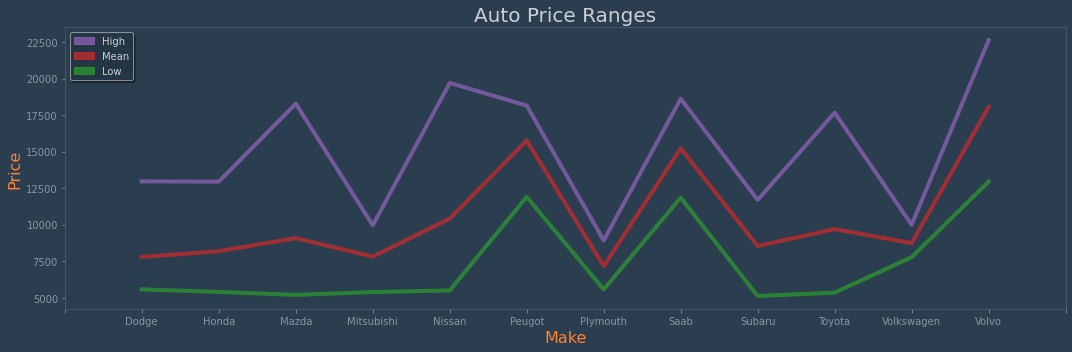

In [21]:
figure = plt.figure(figsize=(15, 5))
prices_gs = mpl.gridspec.GridSpec(1, 1)
prices_axes = gera_plot.make_autos_price_plot(figure, prices_gs, dados)
plt.show()

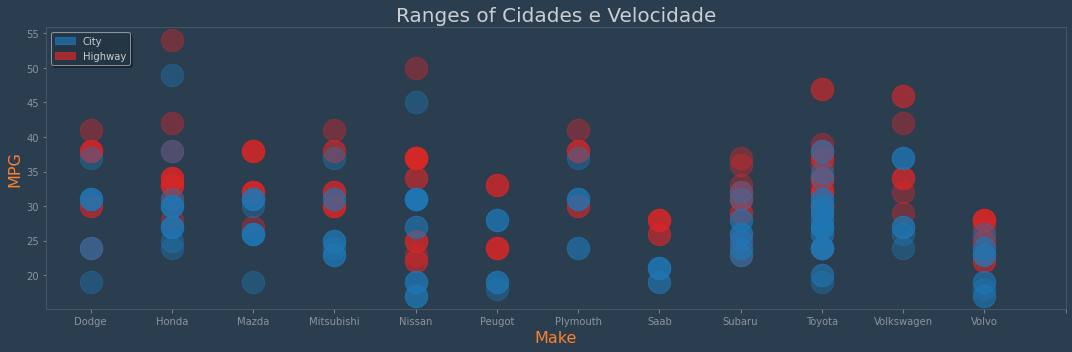

In [22]:
figure = plt.figure(figsize=(15, 5))
mpg_gs = mpl.gridspec.GridSpec(1, 1)
mpg_axes = gera_plot.make_autos_mpg_plot(figure, mpg_gs, dados)
plt.show()

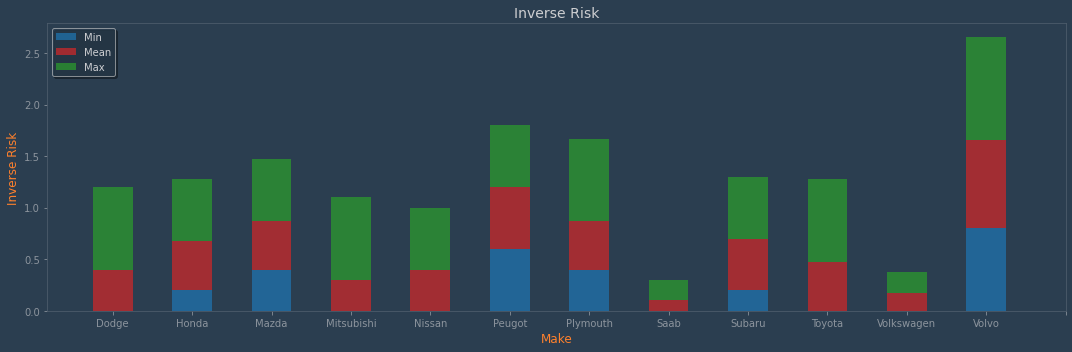

In [23]:
figure = plt.figure(figsize=(15, 5))
risk_gs = mpl.gridspec.GridSpec(1, 1)
risk_axes = gera_plot.make_autos_riskiness_plot(figure, risk_gs, dados_normalizados)
plt.show()

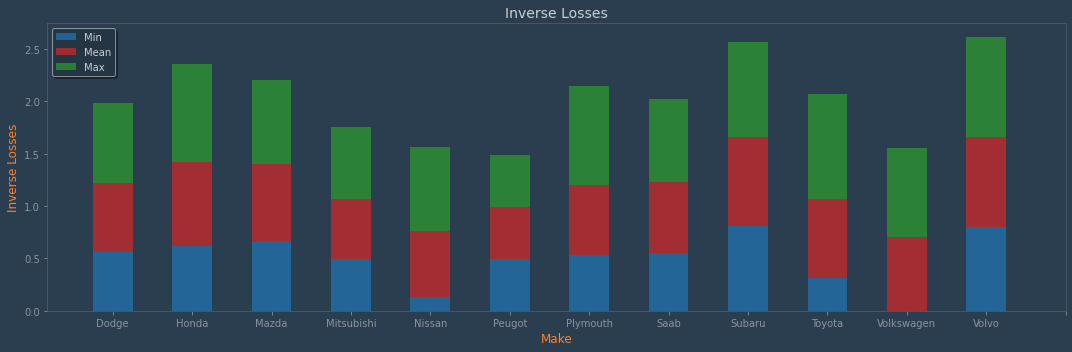

In [24]:
figure = plt.figure(figsize=(15, 5))
loss_gs = mpl.gridspec.GridSpec(1, 1)
loss_axes = gera_plot.make_autos_losses_plot(figure, loss_gs, dados_normalizados)
plt.show()

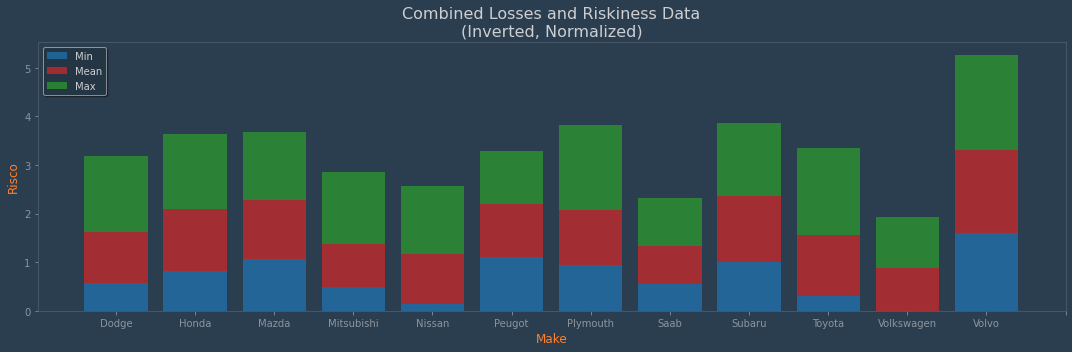

In [25]:
figure = plt.figure(figsize=(15, 5))
risk_loss_gs = mpl.gridspec.GridSpec(1, 1)
risk_loss_axes = gera_plot.make_autos_loss_and_risk_plot(figure, risk_loss_gs, dados_normalizados)
plt.show()

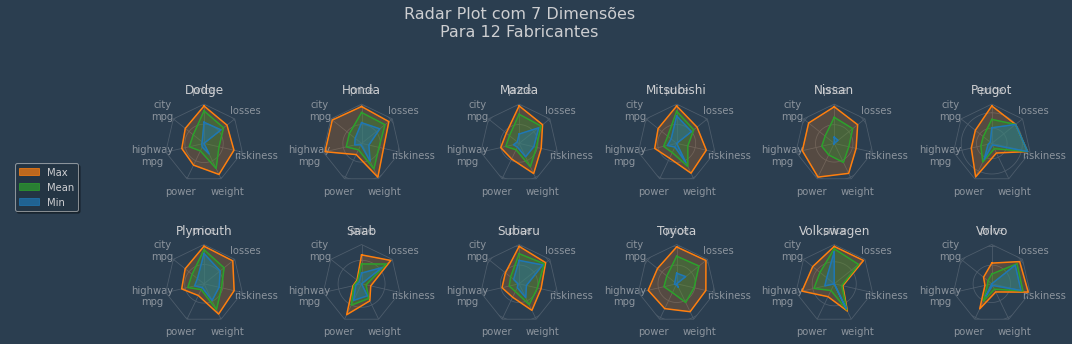

In [26]:
figure = plt.figure(figsize=(15, 5))
radar_gs = mpl.gridspec.GridSpec(3, 7,
                                height_ratios=[1, 10, 10],
                                wspace=0.50,
                                hspace=0.60,
                                top=0.95,
                                bottom=0.25)
radar_axes = gera_plot.make_autos_radar_plot(figure, radar_gs, dados_normalizados)
plt.show()